In [ ]:
import numpy as np
import pandas as pd

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
df = pd.read_csv("/content/predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df_numeric = df.loc[:,['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]
df_cat    = df.loc[:,['Type']]

# **Exploratory Data Analysis - Numerical features**

In [ ]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


<ipython-input-40-59a1d83fbd7e>:7: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



array([[<Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>],
       [<Axes: title={'center': 'Tool wear [min]'}>, <Axes: >]],
      dtype=object)

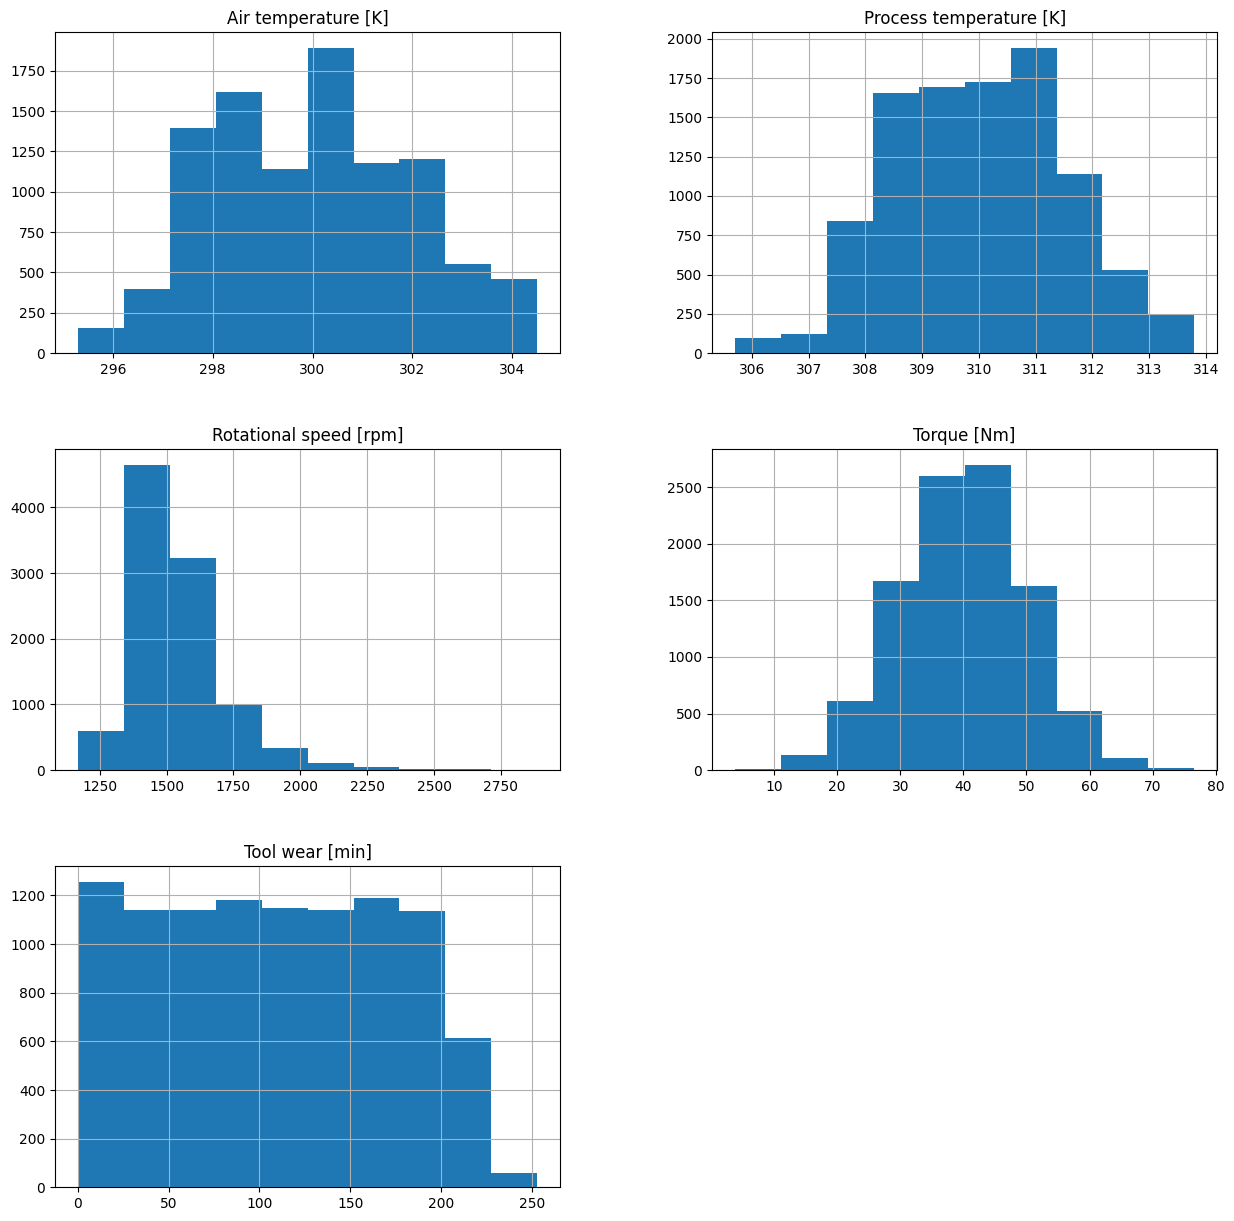

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

fig = plt.figure(figsize = (15,15))
ax  = fig.gca()

df_numeric.loc[:,['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']].hist(ax = ax)

In [ ]:
df_numeric.skew()

Air temperature [K]        0.114274
Process temperature [K]    0.015027
Rotational speed [rpm]     1.993171
Torque [Nm]               -0.009517
Tool wear [min]            0.027292
dtype: float64

# **Exploratory Data Analysis - Categorical features**

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

fig = px.pie(df,
             title  = 'Failure Types',
             values = 'UDI',
             names  = 'Failure Type')
fig.show()

In [ ]:
# Air Temperature relation with Target/Failure Type
fig = px.box(df,
             y      =  "Air temperature [K]",
             x      =  "Target",
             title  =  "Air Temperature relation with Target and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()
# Process Tempearture relation with Target/Failure Type
fig = px.box(df,
             y      =  "Process temperature [K]",
             x      =  "Target",
             title  =  "Process Tempearture relation with Target and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()
# Rotational speed [rpm] relation with Target/Failure Type
fig = px.box(df,
             y      =  "Air temperature [K]",
             x      =  "Target",
             title  =  "Rotational speed [rpm] relation with Target and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()
# Torque [Nm] relation with Target/Failure Type
fig = px.box(df,
             y      =  "Torque [Nm]",
             x      =  "Target",
             title  =  "Torque [Nm] relation with Target and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()
# Tool wear [min] relation with Target/Failure Type
fig = px.box(df,
             y      =  "Tool wear [min]",
             x      =  "Target",
             title  =  "Tool wear [min] relation with Target and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

In [ ]:
# Correlation with Product ID with Failure
pd.pivot_table(df,
               index   = 'Failure Type',
               columns = 'Type',
               values  = 'UDI',
               aggfunc ='count')

Type,H,L,M
Failure Type,,,
Heat Dissipation Failure,8,74,30
No Failure,979,5757,2916
Overstrain Failure,1,73,4
Power Failure,5,59,31
Random Failures,4,12,2
Tool Wear Failure,6,25,14


In [ ]:
pd.pivot_table(df,
               index   = 'Target',
               columns = 'Type',
               values  = 'UDI',
               aggfunc ='count')

Type,H,L,M
Target,,,
0,982,5765,2914
1,21,235,83


# **Data Preprocessing**

In [ ]:
df = df.drop(["UDI","Product ID"],axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Type']         = le.fit_transform(df.loc[:,["Type"]].values)
df['Failure Type'] = le.fit_transform(df.loc[:,["Failure Type"]].values)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,1
1,1,298.2,308.7,1408,46.3,3,0,1
2,1,298.1,308.5,1498,49.4,5,0,1
3,1,298.2,308.6,1433,39.5,7,0,1
4,1,298.2,308.7,1408,40.0,9,0,1


In [ ]:
from sklearn.model_selection import train_test_split

X  = df.iloc[:, :-2].values
y  = df.loc[:,['Target','Failure Type']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler       = StandardScaler()
X_train_sc   = scaler.fit_transform(X_train)                # Fit and transform the training set
X_test_sc    = scaler.transform(X_test)

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
xgb_clf = MultiOutputClassifier(XGBClassifier(objective='binary:logistic'))
xgb_clf.fit(X_train, y_train)
print("Multi-Output Training Accuracy: ", xgb_clf.score(X_train, y_train)*100, "%")

Multi-Output Training Accuracy:  100.0 %


In [ ]:
y_pred_xgb   = xgb_clf.predict(X_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay


In [ ]:
# Performance Metrics
print("Test Accuracy (Target)       : ",accuracy_score(y_test[:,0], y_pred_xgb[:,0])*100,"%")
print("Test Precision (Target)      : ",precision_score(y_test[:,0], y_pred_xgb[:,0])*100,"%")
print("Test Recall (Target)         : ",recall_score(y_test[:,0], y_pred_xgb[:,0])*100,"%")
print("Test Accuracy (Failure Type) : ",accuracy_score(y_test[:,1], y_pred_xgb[:,1])*100,"%")

Test Accuracy (Target)       :  98.4 %
Test Precision (Target)      :  77.77777777777779 %
Test Recall (Target)         :  61.40350877192983 %
Test Accuracy (Failure Type) :  98.35000000000001 %


In [ ]:
# Confusion Matrix
import matplotlib.pyplot as plt
cm             = confusion_matrix(y_test[:,0],
                                  y_pred_xgb[:,0])

disp           = ConfusionMatrixDisplay(confusion_matrix=cm,)

fig, ax        = plt.subplots(figsize = (5,5))

disp.plot(cmap = plt.cm.Blues,
          ax   = ax)

In [ ]:
cm      = confusion_matrix(y_test[:,1],
                           y_pred_xgb[:,1])

disp    = ConfusionMatrixDisplay(confusion_matrix = cm,
                                 display_labels   = ['Heat Dissipation Failure','No Failure','Overstrain Failure','Power Failure','Random Failures','Tool Wear Failure'])

fig, ax = plt.subplots(figsize = (10,10))

disp.plot(cmap = plt.cm.Blues,
          ax   = ax)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming y_train is a NumPy array
y_test_encoded = []
label_encoderss = []

for col in range(y_test.shape[1]):
    le = LabelEncoder()
    y_test_col = y_test[:, col]
    y_test_encoded.append(le.fit_transform(y_test_col))
    label_encoderss.append(le)

# Convert y_train_encoded to a 2D array
y_test_encoded = np.array(y_test_encoded).T

In [ ]:
threshold = np.std(y_pred_xgb)

# Calculate the mean squared error for each sample
mse_per_sample = np.mean((y_test_encoded - y_pred_xgb)**2, axis=1)

# Identify alert points
alert_pointsss = mse_per_sample > threshold


In [ ]:

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_encoded)), y_test_encoded[:, 0], color='blue', label='Actual')  # Assuming y_test_encoded contains multiple target variables, select the first one for plotting
plt.scatter(range(len(y_test_encoded)), y_pred_xgb[:, 0], color='red', label='Predicted')  # Selecting the first target variable for prediction
plt.scatter(np.where(alert_pointsss), y_test_encoded[alert_pointsss, 0], color='green', label='Alert')  # Selecting the first target variable for alert points
plt.xlabel('Index')
plt.ylabel('Target Variable')
plt.title('Actual vs Predicted with Alert Points')
plt.legend()
plt.show()

In [ ]:

import numpy as np
# Plotting the graph
plt.figure(figsize=(6, 4))

# Plot actual values as a line graph
plt.plot(range(len(y_test_encoded)), y_test_encoded[:, 1], color='blue', label='Actual')  # Assuming y_test_encoded contains multiple target variables, select the first one for plotting

# Plot predicted values as a line graph
plt.plot(range(len(y_pred_xgb)), y_pred_xgb[:, 1], color='red', label='Predicted')  # Selecting the first target variable for prediction

# Highlight alert points
alert_indices = np.where(alert_pointsss)[0]
plt.scatter(alert_indices, y_test_encoded[alert_indices,0], color='green', label='Alert')

plt.xlabel('Index')
plt.ylabel('Target Variable')
plt.title('Actual vs Predicted with Alert Points')
plt.legend()
plt.show()


In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
import joblib
joblib.dump(xgb_clf, 'trained_model.pkl')


['trained_model.pkl']

In [ ]:
# Load the model
loaded_model = joblib.load('trained_model.pkl')

# Use loaded_model for predictions or further analysis


In [ ]:
# Extracting probabilities for 'failure' which is the second element in each sub-array of the first output
failure_probabilities = probabilities_output[0][:, 1]
# Creating DataFrame with probabilities of failure
results_df = pd.DataFrame({
    'Probability of Failure': failure_probabilities
})

# Define a threshold for triggering alerts
threshold = 0.5  # Adjust this threshold based on your specific criteria

# Create an Alert column based on the threshold
results_df['Alert'] = results_df['Probability of Failure'].apply(lambda x: 'Alert' if x > threshold else 'No Alert')



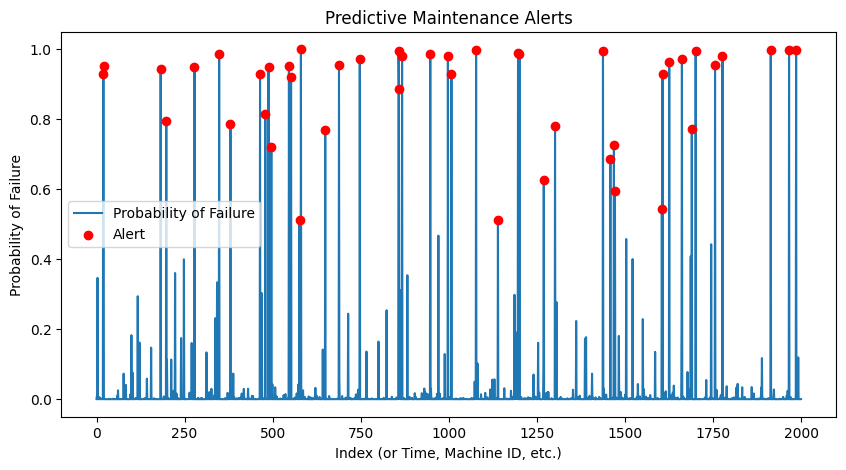

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))  # Set the figure size for the plot
plt.plot(results_df['Probability of Failure'], label='Probability of Failure')  # Plot probabilities
alerts_indices = results_df[results_df['Alert'] == 'Alert'].index  # Get indices where alerts should be triggered
plt.scatter(alerts_indices, results_df.loc[alerts_indices, 'Probability of Failure'], color='red', label='Alert', zorder=5)  # Mark alerts
plt.xlabel('Index (or Time, Machine ID, etc.)')  # X-axis label, adjust as needed
plt.ylabel('Probability of Failure')  # Y-axis label
plt.title('Predictive Maintenance Alerts')  # Title of the plot
plt.legend()  # Show legend
plt.show()  # Display the plot


In [ ]:
results_df

,Probability of Failure,Alert
0,0.000137,No Alert
1,0.008422,No Alert
2,0.000912,No Alert
3,0.346350,No Alert
4,0.000565,No Alert
...,...,...
1995,0.000012,No Alert
1996,0.000524,No Alert
1997,0.000144,No Alert
1998,0.000010,No Alert
